In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("./data_inputs/day18_input.txt") as f:
    input_raw = f.read()

cubes_pos = np.array([list(map(int, cube.split(","))) for cube in input_raw.split("\n")], dtype=np.int8)
len(cubes_pos)

2825

In [3]:
# ---- Part 1 ----

def is_adj(c1, c2):
    return (c1[0] == c2[0] and c1[1] == c2[1] and np.abs(c1[2] - c2[2])) == 1 or \
        (c1[0] == c2[0] and np.abs(c1[1] - c2[1]) == 1 and c1[2] == c2[2]) or \
        (np.abs(c1[0] - c2[0]) == 1 and c1[1] == c2[1] and c1[2] == c2[2])


total_area = len(cubes_pos) * 6

for cube in cubes_pos:
    for cube2 in cubes_pos[np.sum(cube == cubes_pos, axis=1) == 2]:
        if is_adj(cube, cube2):
            total_area -= 1

print("Result 1:", total_area)

Result 1: 4348


In [4]:
# ---- Part 2 ----

np.min(cubes_pos, axis=0), np.max(cubes_pos, axis=0)

(array([0, 0, 0], dtype=int8), array([21, 20, 21], dtype=int8))

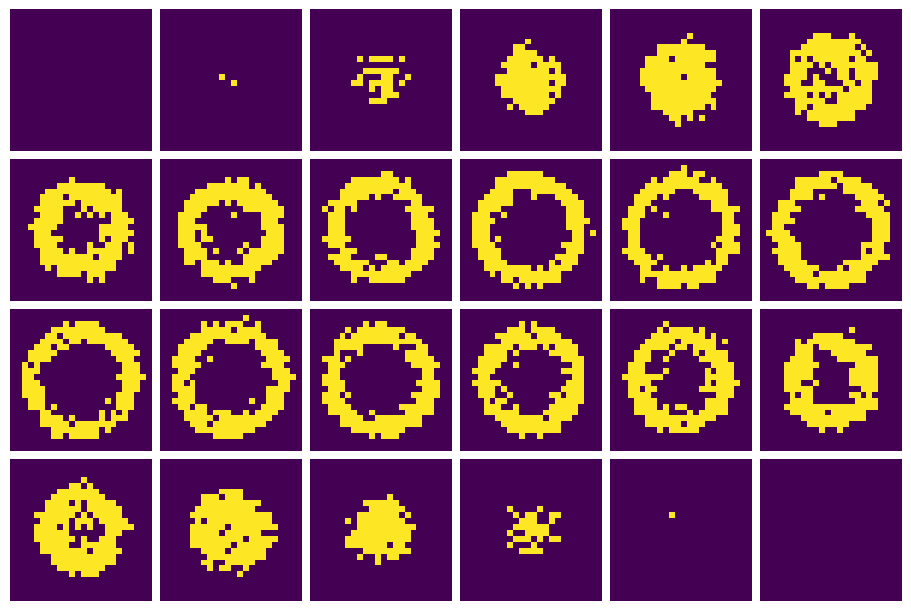

In [5]:
def plot_layers(volcano_map):
    fig, axs = plt.subplots(4, 6, figsize=(9, 6), constrained_layout=True)
    for ax in axs.flat:
        ax.axis("off")
    for ax, layer in zip(axs.flat, volcano_map):
        ax.imshow(layer, vmin=0, vmax=3)
    
    plt.show()


UNKNOWN = 0
AIR = 1
ROCK = 3

volcano_map = np.zeros((22, 22, 22), dtype=np.int8)

# Inserting rocks in the map
volcano_map[cubes_pos[:, 0], cubes_pos[:, 1], cubes_pos[:, 2]] = ROCK

# Expandign the map one unit to each direction in order to isolate boundary rocks
_volcano_map = np.zeros((np.array(volcano_map.shape) + 2))
_volcano_map[1:-1, 1:-1, 1:-1] = volcano_map
volcano_map = _volcano_map.copy()

plot_layers(volcano_map)

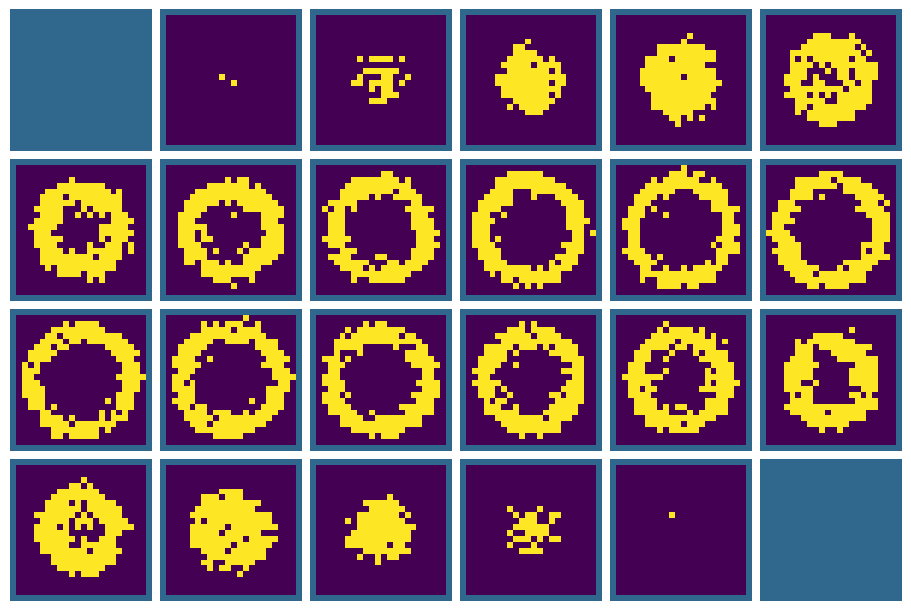

In [6]:
# Inserting air in the boundaries of the map
volcano_map[0, :, :] = 1
volcano_map[-1, :, :] = 1
volcano_map[:, 0, :] = 1
volcano_map[:, -1, :] = 1
volcano_map[:, :, 0] = 1
volcano_map[:, :, -1] = 1

plot_layers(volcano_map)

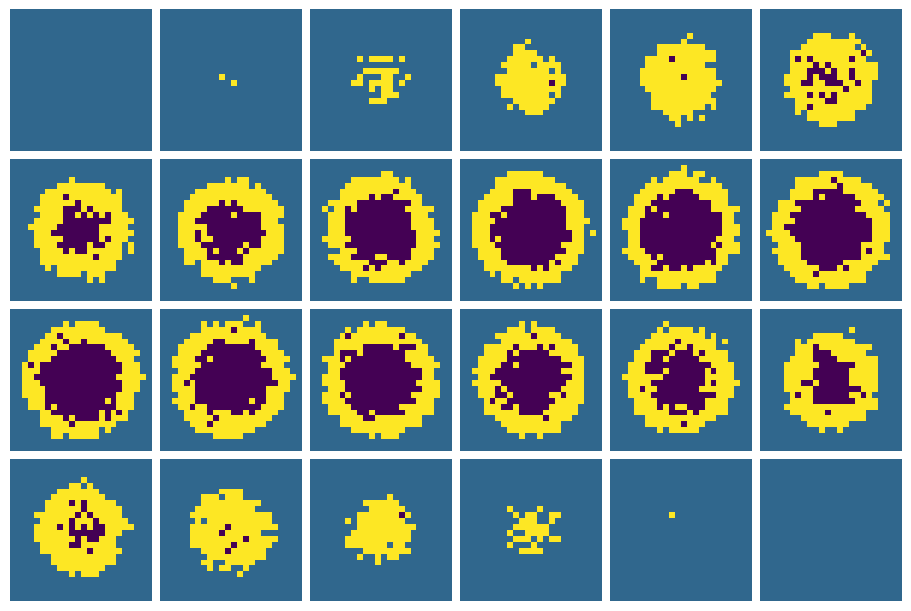

In [7]:
def air_expansion(cube_pos):
    if volcano_map[*cube_pos] == ROCK:
        return False

    elif volcano_map[*cube_pos] == AIR:
        return True

    else:
        neighbors_pos = [[cube_pos[0]-1, cube_pos[0]+1] + [cube_pos[0]]*4,
                    [cube_pos[1]]*2 + [cube_pos[1]-1, cube_pos[1]+1] + [cube_pos[1]]*2,
                    [cube_pos[2]]*4 + [cube_pos[2]-1, cube_pos[2]+1]]

        return np.any(volcano_map[*neighbors_pos] == AIR)


curr_air = np.sum(volcano_map == AIR)
prev_air = 0
its = 0

while curr_air > prev_air:
    prev_air = curr_air

    for i in range(volcano_map.shape[0]):
        for j in range(volcano_map.shape[1]):
            for k in range(volcano_map.shape[2]):
                cube_pos = [i, j, k]
                if air_expansion(cube_pos):
                    volcano_map[*cube_pos] = AIR

    curr_air = np.sum(volcano_map == AIR)
    its += 1

plot_layers(volcano_map)

In [8]:
def get_rock_surface(cube_pos):
    if volcano_map[*cube_pos] != ROCK:
        return 0

    else:
        neighbors_pos = [[cube_pos[0]-1, cube_pos[0]+1] + [cube_pos[0]]*4,
                    [cube_pos[1]]*2 + [cube_pos[1]-1, cube_pos[1]+1] + [cube_pos[1]]*2,
                    [cube_pos[2]]*4 + [cube_pos[2]-1, cube_pos[2]+1]]

        return np.sum(volcano_map[*neighbors_pos] == AIR)


total_area2 = 0

for i in range(volcano_map.shape[0]):
    for j in range(volcano_map.shape[1]):
        for k in range(volcano_map.shape[2]):
            cube_pos = [i, j, k]
            total_area2 += get_rock_surface(cube_pos)

print("Result 2:", total_area2)

Result 2: 2546
